In [73]:
import hashlib
from randomgen import ChaCha
import pprint
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
pp = pprint.PrettyPrinter(indent=4, depth=256)
import csv

from functions import *

OUT_DIR = "data/"
IRATES_FILENAME = "base_irates.tsv"
BASE_REAUTH_TIMES_FILENAME = "base_reauth.tsv"
SEC_OH_FILENAME = "sec_oh_tradeoff.tsv"

In [8]:
SCHEME_INSTS = [
	SchemeInst("RIPEMD-128", 16, 64, 16, 8, False, "Low security"),
	SchemeInst("RIPEMD-128", 16, 64, 8, 16, True),
	SchemeInst("RIPEMD-160", 20, 80, 10, 16, True),
	SchemeInst("RIPEMD-160", 20, 80, 16, 10, False, "Unvafourable signature size"),
	SchemeInst("SHA3-224", 28, 112, 16, 14, False, "Unvafourable signature size"),
	SchemeInst("SHA3-224", 28, 112, 14, 16, True),
	SchemeInst("SHA3-256", 32, 128, 16, 16, True),
	SchemeInst("SHA3-384", 48, 192, 24, 16, True),
	SchemeInst("SHA3-384", 48, 192, 16, 24, False, "Unvafourable secret key size"),
	SchemeInst("SHA3-512", 64, 256, 32, 16, True),
]
# for s in SCHEME_INSTS:
# 	print(s)

In [9]:
CONFIGS = [
	Connfiguration("exp", get_exp_ratios(1, 1024, 6)),
	Connfiguration("lin", get_lin_ratios(1, 1354, 6)),
	Connfiguration("log", get_log_ratios(1, 1360, 6)),
]

pp.pprint(CONFIGS)

[   Connfiguration(name='exp', key_ratios=[1024, 256, 64, 16, 4, 1]),
    Connfiguration(name='lin', key_ratios=[1354, 1083, 812, 542, 271, 1]),
    Connfiguration(name='log', key_ratios=[1360, 1357, 1344, 1286, 1040, 1])]


## Signature scheme candidate instances

In [13]:
print_scheme_candidates(SCHEME_INSTS)
print_selected_scheme(SCHEME_INSTS)

Instance name & Hash function & N & K & $\tau$ & Comment \\
\midrule 
\textcolor{red}{HORST-RIPEMD-128} & \textcolor{red}{RIPEMD-128} & \textcolor{red}{16} & \textcolor{red}{16} & \textcolor{red}{8} & \textcolor{red}{Low security} \\
HORST-RIPEMD-128 & RIPEMD-128 & 16 & 8 & 16 &  \\
HORST-RIPEMD-160 & RIPEMD-160 & 20 & 10 & 16 &  \\
\textcolor{red}{HORST-RIPEMD-160} & \textcolor{red}{RIPEMD-160} & \textcolor{red}{20} & \textcolor{red}{16} & \textcolor{red}{10} & \textcolor{red}{Unvafourable signature size} \\
\textcolor{red}{HORST-SHA3-224} & \textcolor{red}{SHA3-224} & \textcolor{red}{28} & \textcolor{red}{16} & \textcolor{red}{14} & \textcolor{red}{Unvafourable signature size} \\
HORST-SHA3-224 & SHA3-224 & 28 & 14 & 16 &  \\
HORST-SHA3-256 & SHA3-256 & 32 & 16 & 16 &  \\
HORST-SHA3-384 & SHA3-384 & 48 & 24 & 16 &  \\
\textcolor{red}{HORST-SHA3-384} & \textcolor{red}{SHA3-384} & \textcolor{red}{48} & \textcolor{red}{16} & \textcolor{red}{24} & \textcolor{red}{Unvafourable secret key 

## Scatter plot of security vs overhead

In [67]:
def plot_scatter_heat(pks, ohs, sec):
	min_sec = min(sec)
	max_sec = max(sec)

	norm = mcolors.Normalize(vmin=min_sec, vmax=max_sec)
	colormap = plt.cm.get_cmap('RdYlGn', len(sec))

	for i, oh in enumerate(ohs):
		colour = sec[i]
		plt.plot(pks, oh,color=colormap(norm(colour)),alpha=1)
	plt.show()

[   [2176, 3952, 5728, 7504, 9280, 11056, 12832, 14608, 16384, 18176],
    [3400, 5620, 7840, 10060, 12280, 14500, 16720, 18940, 21160, 23400],
    [6664, 9772, 12880, 15988, 19096, 22204, 25312, 28420, 31528, 34664],
    [8704, 12256, 15808, 19360, 22912, 26464, 30016, 33568, 37120, 40704],
    [19584, 24912, 30240, 35568, 40896, 46224, 51552, 56880, 62208, 67584],
    [34816, 41920, 49024, 56128, 63232, 70336, 77440, 84544, 91648, 98816]]


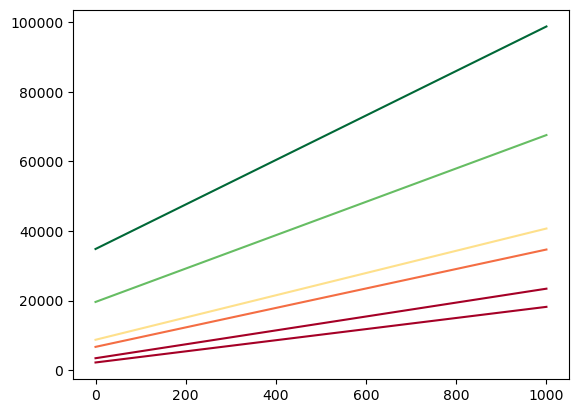

In [74]:
POINTS = 10
pks = [int(x) for x in np.linspace(0, 1000, POINTS)]

fin_pks = pks
fin_oh = []
fin_sec = []
with open(OUT_DIR + SEC_OH_FILENAME, mode='w', newline='') as ofh:
	writer = csv.writer(ofh, delimiter='\t', quotechar='"', quoting=csv.QUOTE_MINIMAL)
	writer.writerow(['instance', 'bit_sec', 'pks', 'oh'])
	for s in SCHEME_INSTS:
		if not s.ok:
			continue
		sec = s.bit_sec
		fin_sec.append(sec)
		oh = []
		for pk in pks:
			overhead = s.sig_size + pk * s.pk_size
			oh.append(overhead)
			writer.writerow([s.name, s.bit_sec, pk, overhead])

		fin_oh.append(oh)

pp.pprint(fin_oh)

plot_scatter_heat(fin_pks, fin_oh, fin_sec)



## Theoretic key epochs & expected re-auth interval

irates: [1365.3793505968981, 1362.3674843823462, 1349.3160641192876, 1291.0866506379493, 1044.1136210446869, 1.0039554048506605]
key_ratios:[1024, 256, 64, 16, 4, 1]
key_ratios:[1354, 1083, 812, 542, 271, 1]
key_ratios:[1360, 1357, 1344, 1286, 1040, 1]
durs:[1024, 256, 64, 16, 4, 1]
durs:[1354, 1083, 812, 542, 271, 1]
durs:[1360, 1357, 1344, 1286, 1040, 1]


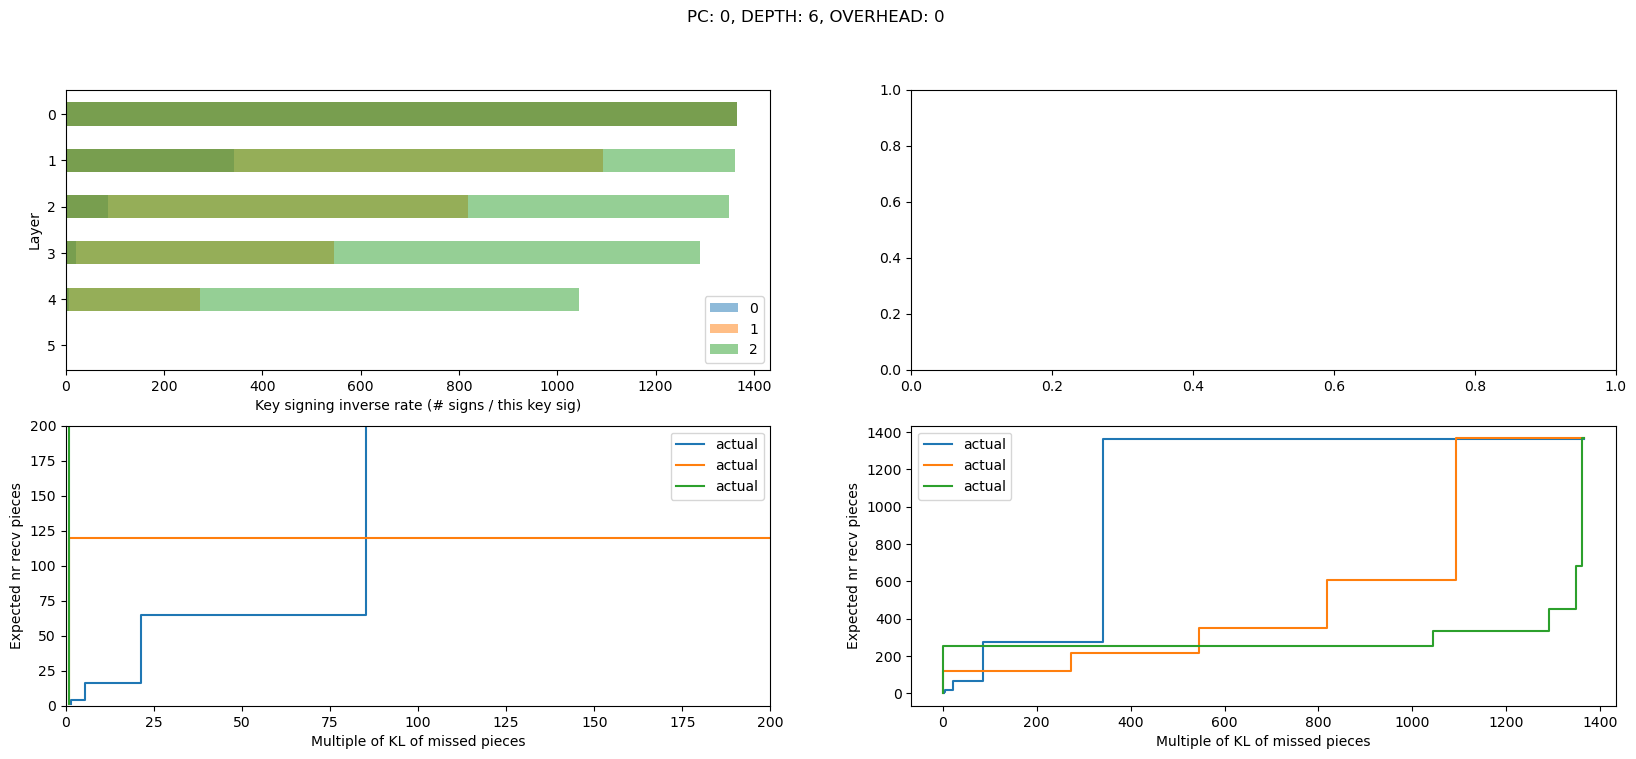

In [87]:
key_ratioss = [(config.name, config.key_ratios) for config in CONFIGS]

with open(OUT_DIR + IRATES_FILENAME, mode='w', newline='') as ofh:
	writer = csv.writer(ofh, delimiter='\t', quotechar='"', quoting=csv.QUOTE_MINIMAL)
	writer.writerow(['configuration', 'layer', 'irate'])
	
	for cfg_name, key_ratios in key_ratioss:
		irates, _ = durs_to_irates(key_ratios)
		for i, irate in enumerate(irates):
			writer.writerow([cfg_name, i, int(irate)])

	re_auth_xs, re_auth_ys = calc_reauth_times(key_ratios, 1)
	print(f"irates: {irates}")


for cfg_name, key_ratios in key_ratioss:
	print(f"key_ratios:{key_ratios}")
	with open(OUT_DIR + f"{cfg_name}_" + BASE_REAUTH_TIMES_FILENAME, mode='w', newline='') as ofh:
		writer = csv.writer(ofh, delimiter='\t', quotechar='"', quoting=csv.QUOTE_MINIMAL)
		writer.writerow(['configuration', 'num_missed', 'mean_reauth'])
		
		re_auth_xs, re_auth_ys = calc_reauth_times(key_ratios, 0)
		for x, y in zip(re_auth_xs, re_auth_ys):
			writer.writerow([cfg_name, int(x), int(y)])

plot_reauth_times([x for _,x in key_ratioss], 0, 0)

In [ ]:

for input in INPUTS:
	print(f"INPUT RE-AUTH TIMES: {input}")
	oh, durs, _probs, pc, _depth = gen_params(input, overhead_fn_rect)
	print(f"oh: {oh}, pc: {pc}, depth: {_depth}")
	plot_reauth_times(durs, pc, oh, expected=input)
	